In [1]:
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import cv2

%matplotlib inline

2025-04-11 17:46:44.297746: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 17:46:44.706972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744393604.827575    1614 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744393604.855778    1614 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 17:46:45.089254: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
images = []
target = []
img_size = 227
glaucoma_path = "./data/glaucoma/"
normal_path = "./data/normal/"

for file in os.listdir(glaucoma_path):
    image_path = glaucoma_path + file
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size,img_size))
    images.append(img)
    target.append(1)

for file in os.listdir(normal_path):
    image_path = normal_path + file
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size,img_size))
    images.append(img)
    target.append(0)

images = np.array(images).astype("float32")
images = images / 255.
target = np.array(target).astype("float32")

print(images.shape)
print(target.shape)

(1840, 227, 227, 3)
(1840,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.2, random_state=123, shuffle=True, stratify=target)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1472, 227, 227, 3)
(1472,)
(368, 227, 227, 3)
(368,)


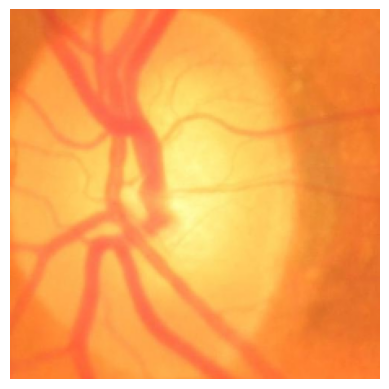

In [5]:
img = X_train[0]
plt.imshow(img)
plt.axis("off")
plt.show()

In [6]:
# Baseline accuracy: predict most frequent class for every instance
print(np.unique(y_train, return_counts=True))
np.mean(y_train == 0)

(array([0., 1.], dtype=float32), array([883, 589]))


0.5998641304347826

In [7]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(227,227,3), name="input"),

    layers.Conv2D(96, (11,11), strides=(4,4), padding="valid", activation="relu", name="conv1"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"),

    layers.Conv2D(256, (5,5), strides=(1,1), padding="same", activation="relu", name="conv2"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"),

    layers.Conv2D(384, (3,3), strides=(1,1), padding="same", activation="relu", name="conv3"),

    layers.Conv2D(384, (3,3), strides=(1,1), padding="same", activation="relu", name="conv4"),

    layers.Conv2D(256, (3,3), strides=(1,1), padding="same", activation="relu", name="conv5"),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"),

    layers.Flatten(),

    layers.Dense(4096, activation="relu", name="fc6"),
    layers.Dense(4096, activation="relu", name="fc7"),
    layers.Dense(1000, activation="softmax", name="fc8"),
    layers.Dense(1, activation="sigmoid", name="prob"),

])

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


W0000 00:00:1744393619.880448    1614 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2, batch_size=128)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5503 - loss: 0.6889 - val_accuracy: 0.6441 - val_loss: 0.6811
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5773 - loss: 0.6869 - val_accuracy: 0.6441 - val_loss: 0.6791
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5960 - loss: 0.6840 - val_accuracy: 0.6441 - val_loss: 0.6771
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6049 - loss: 0.6818 - val_accuracy: 0.6441 - val_loss: 0.6753
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5916 - loss: 0.6825 - val_accuracy: 0.6441 - val_loss: 0.6739
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6097 - loss: 0.6791 - val_accuracy: 0.6441 - val_loss: 0.6726
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5920 - loss: 0.6812 - val_accuracy: 0.6441 - val_loss: 0.6717
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5934 - loss: 0.6805 - val_accuracy: 0.6441 - val_loss:

In [9]:
feature_extractor = keras.Model(inputs=model.inputs, outputs=model.get_layer("fc8").output)
train_features = feature_extractor.predict(X_train)
test_features = feature_extractor.predict(X_test)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(32, 227, 227, 3))
  warnings.warn(msg)


46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(None, 227, 227, 3))
  warnings.warn(msg)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step


In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_clf = make_pipeline(StandardScaler(), SVC(kernel="linear"))
svm_clf.fit(train_features,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [11]:
from sklearn.metrics import accuracy_score
y_pred = svm_clf.predict(train_features)
print(f"Train Accuracy: {100*accuracy_score(y_train,y_pred):.2f}")
y_pred = svm_clf.predict(test_features)
print(f"Test Accuracy: {100*accuracy_score(y_pred,y_test):.2f}")

Train Accuracy: 59.99
Test Accuracy: 60.05
